# Métodos para resolver sistemas lineares :

* Grupo: Lorenzo Donato, Nilo Gonçalves, Caio Victor



***


# Método de Cholesky

## 📌 Definição
O **Método de Cholesky**, também chamado de **Fatoração de Cholesky**, é um método numérico **direto** e eficiente para resolver sistemas lineares da forma $Ax = b$, onde:

- $A$ é uma matriz quadrada;  
- $x$ é o vetor incógnita;  
- $b$ é o vetor de termos independentes.  

A fatoração de Cholesky se aplica **somente** quando a matriz $A$ é **simétrica** ($A = A^T$) e **definida positiva**.  

Sua principal característica e, ao mesmo tempo, sua maior limitação, é que ele só pode ser aplicado quando a matriz de coeficientes $A$ é **simétrica** e **definida positiva**.

---

## 📌 Fórmula
A ideia é decompor $A$ na forma:

$$A = L \cdot L^T$$

Onde:  
- $L$ é uma matriz triangular inferior;  
- $L^T$ é a transposta de $L$, triangular superior.  

Isso transforma o problema $Ax = b$ em duas etapas:

1. Resolver $Ly = b$ (substituição direta).  
2. Resolver $L^T x = y$ (substituição retroativa).  

---

## 📌 Vantagens
- Requer **menos operações** que a decomposição LU.  
- Mais eficiente quando $A$ é simétrica definida positiva.  
- Muito usado em aplicações de engenharia, estatística, aprendizado de máquina e simulação numérica.  

---

## 📌 Exemplo prático
Considere o sistema:

$$A = \begin{bmatrix} 4 & 2 \\ 2 & 3 \end{bmatrix}, \quad b = \begin{bmatrix} 6 \\ 5 \end{bmatrix}$$

### 1. Fatoração
Decompondo $A = L L^T$:

$$L = \begin{bmatrix} 2 & 0 \\ 1 & \sqrt{2} \end{bmatrix}, \quad
L^T = \begin{bmatrix} 2 & 1 \\ 0 & \sqrt{2} \end{bmatrix}$$

---

### 2. Resolver $Ly = b$

$$
\begin{bmatrix}
2 & 0 \\
1 & \sqrt{2}
\end{bmatrix}
\begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}
=
\begin{bmatrix}
6 \\
5
\end{bmatrix}
$$

- $2y_1 = 6 \;\;\Rightarrow\;\; y_1 = 3$  
- $y_1 + \sqrt{2}y_2 = 5 \;\;\Rightarrow\;\; y_2 = 1$  

Logo: $y = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$  

---

### 3. Resolver $L^T x = y$

$$
\begin{bmatrix}
2 & 1 \\
0 & \sqrt{2}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
3 \\
1
\end{bmatrix}
$$

- $\sqrt{2}x_2 = 1 \;\;\Rightarrow\;\; x_2 = \tfrac{1}{\sqrt{2}}$  
- $2x_1 + x_2 = 3 \;\;\Rightarrow\;\; x_1 = \tfrac{5}{2}$  

---

### ✅ Solução final
$$x = \begin{bmatrix} \tfrac{5}{2} \\ \tfrac{1}{\sqrt{2}} \end{bmatrix}$$


> Exemplo de código em Python que implementa o método Cholesky:

## Funções auxiliares

Para implementar Cholesky de forma didática, vamos precisar de algumas funções:

- **is_symmetric(A)**: verifica se A é simétrica.  
- **is_positive_definite(A)**: testa se A é definida positiva (via tentativa de Cholesky do NumPy).  
- **cholesky_decomposition(A)**: implementação manual da decomposição.  
- **forward_substitution(L, b)**: resolve \(Ly=b\).  
- **backward_substitution(U, y)**: resolve \(Ux=y\).  
- **cholesky_solve(A, b)**: resolve o sistema \(Ax=b\) usando Cholesky (manual ou NumPy).  
- **generate_spd_matrix(n)**: gera matrizes simétricas definidas positivas.  


In [3]:
def is_symmetric(A, tol=1e-10):
    A = np.array(A, dtype=float)
    return np.allclose(A, A.T, atol=tol)

def is_positive_definite(A):
    A = np.array(A, dtype=float)
    try:
        np.linalg.cholesky(A)
        return True
    except np.linalg.LinAlgError:
        return False

def cholesky_decomposition(A, tol=1e-12):
    A = np.array(A, dtype=float)
    n, m = A.shape
    if n != m:
        raise ValueError("A matriz deve ser quadrada.")
    if not is_symmetric(A):
        raise ValueError("A matriz não é simétrica.")

    L = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            s = sum(L[i, k] * L[j, k] for k in range(j))
            if i == j:
                val = A[i, i] - s
                if val <= tol:
                    raise np.linalg.LinAlgError("Matriz não é definida positiva.")
                L[i, j] = np.sqrt(val)
            else:
                L[i, j] = (A[i, j] - s) / L[j, j]
    return L

def forward_substitution(L, b):
    n = L.shape[0]
    y = np.zeros(n)
    for i in range(n):
        s = sum(L[i, j] * y[j] for j in range(i))
        y[i] = (b[i] - s) / L[i, i]
    return y

def backward_substitution(U, y):
    n = U.shape[0]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        s = sum(U[i, j] * x[j] for j in range(i+1, n))
        x[i] = (y[i] - s) / U[i, i]
    return x

def cholesky_solve(A, b, use_numpy=False):
    if use_numpy:
        L = np.linalg.cholesky(A)
    else:
        L = cholesky_decomposition(A)
    y = forward_substitution(L, b)
    x = backward_substitution(L.T, y)
    return x, L

def generate_spd_matrix(n, seed=None, eps=1e-6):
    if seed is not None:
        np.random.seed(seed)
    M = np.random.randn(n, n)
    return M.T @ M + eps * np.eye(n)


## Visualização gráfica

Para melhor compreensão, vamos visualizar as matrizes **A** e **L** como *heatmaps* (mapas de calor).


In [ ]:
def plot_heatmap(A, title="Matriz"):
    plt.figure(figsize=(5, 4))
    plt.title(title)
    plt.imshow(A, cmap="viridis", aspect="auto")
    plt.colorbar()
    plt.xlabel("Colunas")
    plt.ylabel("Linhas")
    plt.show()


## Exemplo 1: Sistema pequeno (2x2)

Seja:

$$
A = \begin{bmatrix} 4 & 2 \\ 2 & 3 \end{bmatrix}, \quad 
b = \begin{bmatrix} 6 \\ 5 \end{bmatrix}
$$

Vamos aplicar o método de Cholesky **passo a passo**.


In [ ]:
A_example = np.array([[4.0, 2.0],
                      [2.0, 3.0]])
b_example = np.array([6.0, 5.0])

print("Matriz A:")
display(pd.DataFrame(A_example))
print("Vetor b:", b_example)

print("\nChecagens:")
print("Simétrica?", is_symmetric(A_example))
print("Definida Positiva?", is_positive_definite(A_example))

L = cholesky_decomposition(A_example)
print("\nMatriz L (Cholesky):")
display(pd.DataFrame(np.round(L, 6)))

x, _ = cholesky_solve(A_example, b_example)
print("\nSolução x:", x)

plot_heatmap(A_example, "Heatmap de A")
plot_heatmap(L, "Heatmap de L")


## Exemplo 2: Matriz maior aleatória

Agora vamos gerar uma matriz **SPD** \(6 \times 6\) e resolver o sistema:

\[
Ax = b
\]

para observar o comportamento do método em dimensões maiores.


Matriz A (aleatória SPD):


,0,1,2,3,4,5
0,4.2831,0.7878,-1.5332,2.1142,-1.3225,1.4113
1,0.7878,9.7076,0.6278,-0.3170,2.9761,-1.2078
2,-1.5332,0.6278,7.0893,0.9526,2.5922,-2.2110
3,2.1142,-0.3170,0.9526,4.2420,-1.1495,0.7174
4,-1.3225,2.9761,2.5922,-1.1495,2.3383,-0.9728
5,1.4113,-1.2078,-2.2110,0.7174,-0.9728,3.9769



Solução x (manual): [  6.72704  -16.625099 -22.41166   16.851177  54.422953  -9.5802  ]
Erro de reconstrução (||A - LL^T||): 1.993770148541515e-15


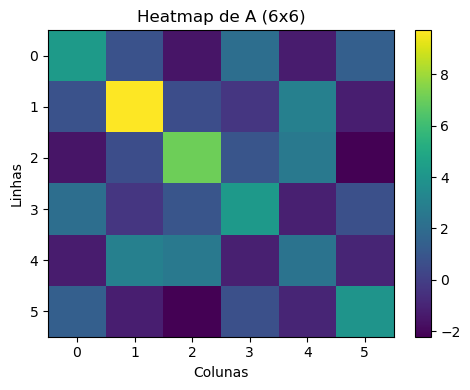

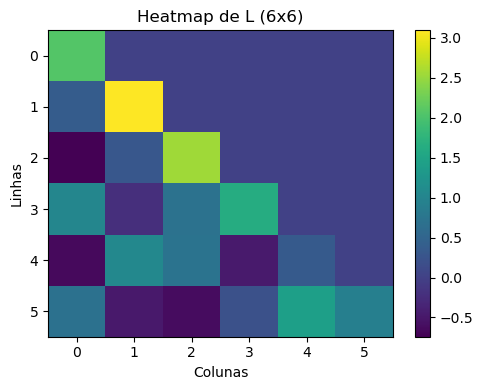

In [4]:
A_spd = generate_spd_matrix(6, seed=42, eps=1e-3)
b_spd = np.random.randn(6)

print("Matriz A (aleatória SPD):")
display(pd.DataFrame(np.round(A_spd, 4)))

x_manual, L_manual = cholesky_solve(A_spd, b_spd, use_numpy=False)

print("\nSolução x (manual):", np.round(x_manual, 6))
print("Erro de reconstrução (||A - LL^T||):", np.linalg.norm(A_spd - L_manual @ L_manual.T))

plot_heatmap(A_spd, "Heatmap de A (6x6)")
plot_heatmap(L_manual, "Heatmap de L (6x6)")


# Conclusão

- O método de Cholesky é **rápido e eficiente** para sistemas $Ax = b$.  
- Só pode ser aplicado se $A$ for **simétrica definida positiva**.  
- A decomposição $A = L L^T$ facilita a resolução do sistema em **duas etapas**.  

✅ **Aplicações práticas**:  
- Computação científica  
- Estatística (matriz de covariâncias)  
- Machine Learning (Gaussian Processes, regressão linear, otimização)  

👉 Você pode experimentar no código alterando:  
- O tamanho `n` na função `generate_spd_matrix`  
- O vetor `b`  
- E comparar sempre com `np.linalg.solve` para validar os resultados  
